# 오차역전파법

지금까지 신경망 학습에 대해서 공부했다. 그 떄 신경망의 가중치 매개변수의 기울기는 수치 미분을 사용해 구했다. 수치 미분은 단순하고 구현하기도 쉽지만 계산 시간이 오래 걸린다는게 단점이다. 이번에는 가중치 매개변수의 기울기를 효율적으로 계산하는 **"오차역전파법(Backpropagtion)"**을 알아보자.


오차역전파법을 제대로 이해하는 방법은 두 가지가 있다. 하나는 수식을 통한 것이고, 다른 하나는 계산 그래프를 통한 것이다. 전자는 일반적인 방법이고, 특히 기계학습을 다루는 책 대부분은 수식을 중심으로 이야기를 전개한다. 확실히 수식을 사용한 설명은 정확하고 간결하므로 올바른 방법이라 할 수 있다.


하지만, 이번에는 계산 그래프를 통해 "시각적"으로 이해해보자.

# 계산 그래프

**계산 그래프(computational Graph)**는 계산 과정을 그래프로 나타낸 것이다. 여기에서의 그래프는 우리가 잘 아는 그래프 자료구조로, 복수의 노드(node)와 엣지(edge)로 표현된다.


노드와 노드사이의 직선을 엣지라고 표현한다.

# 계산 그래프로 풀다

간단한 문제를 계산 그래프를 사용해서 풀어보자. 간단한 문제는 암산으로 풀 정도로 간단하지만, 목적은 계산 그래프에 익숙해지는 것이다.


##### 문제 1 : 현빈 군은 슈퍼에서 1개에 100원인 사과 2개를 샀다. 이 때 지불 금액을 구하라. 단, 소비세가 10% 부과된다. 


계산 그래프는 계산 과정을 노드와 화살표로 표현한다. 노드는 원(O)으로 표현하고 원 안에 연산 내용을 적는다. 또, 계산 결과를 화살표 위에 적어 각 노드의 계산 결과과 왼쪽에서 오른쪽으로 전해지게 한다.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

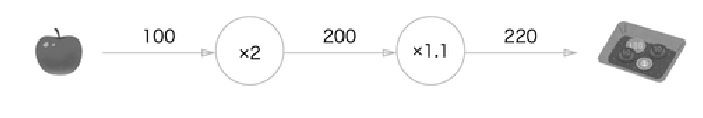

In [2]:
img = imread("./Image/5-1.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

위의 그림과 같이 처음에 사과의 100원이 "X2"의 노드로 흐르고, 200원이 되어 다음 노드로 전달된다. 이제 200원이 "X1.1"의 노드를 거쳐 220원이 된다. 따라서 이 계산 그래프에 따르면 최종 답은 220원이 된다.


또한 "X2"와 "X1.1"을 가각 하나의 연산으로 취급해 원 안에 표기했지만, 곱셈인 "X"만 연산으로 생각할 수 있ㄷ. 그러헥 하면 "2"와 "1.1"은 각각 "사과의 개수"와 "소비세" 변수가 되어 원 밖에 표기하게 된다.

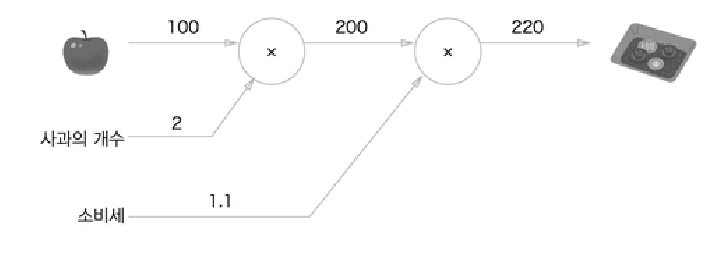

In [3]:
img = imread("./Image/5-2.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

##### 문제 2 : 현빈 군은 슈퍼에서 사과를 2개, 귤을 3개를 샀다. 사과는 1개에 100원, 귤은 1개에 150원이다. 소비세가 10%일 때 지불 금액을 구하라.

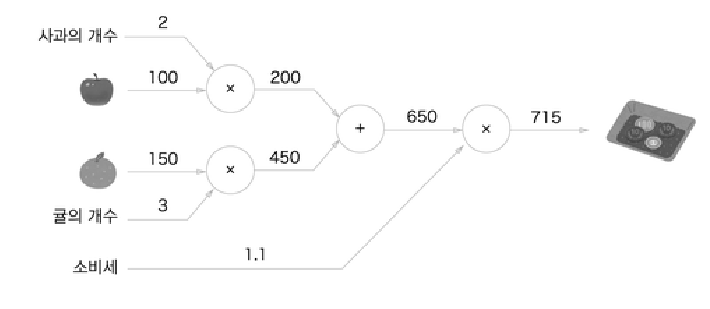

In [4]:
img = imread("./Image/5-3.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

이 문제에는 덧셈 노드인 "+"가 새롭게 등장하여 사과와 귤의 금액을 합산한다. 계산 그래프는 왼쪽에서 오른쪽으로 계산을 진행한다. 회로에 전류가 흐르듯 계산 결과가 왼쪽에서 오른쪽으로 전달된다. 계산 결과가 오른쪽에 도착하면 거기가 끝이다. 그래서 답은 715원이다.


지금까지 살펴본 것처럼 계산 그래프를 이용한 문제풀이는 다음의 흐름으로 진행된다.


    1.계산 그래프를 구성한다.
    2.그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다.
 
 
여기서 2번째 "계산을 왼쪽에서 오른쪽으로 진행"하는 단계를 **순전파("Forwad propagation")** 라고 한다. 순전파는 계산 그래프의 출발점부터 종착점으로의 전파이다. 순전파와는 반대 방향의 전파도 가능하다. 그것을 **"역전파(Backwarpropagtion)"** 라고 한다. 역전파는 이후에 미분을 계산할 때 중요한 역학을 한다.

# 국소적 계산

계산 글프의 특징은 "국소적 계산"을 전파함으로써 최종 결과를 얻는다는 점에 있다. 국소적이란 "자신과 직접 관계된 작은 범위"라는 뜻이다. 국소적 계산은 결국 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과를 출력할 수 있다는 뜻이다.


예를 들어 슈퍼마켓에서 사과 2개를 포함한 여러 식품을 구입하는 경우를 생각해보자.

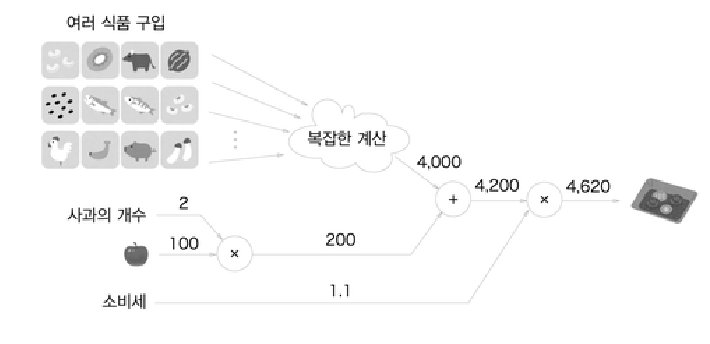

In [5]:
img = imread("./Image/5-4.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

위의 그림에서 여러 식품을 구입하여 총 금액이 4,000원이 되었다. 여기서 핵심은 각 노드에서의 계산은 국소적이라는 점이다. 가령 사과와 그 외의 물품 값을 더하는 계산(4,000 + 200 -> 4,200)은 4,000이라는 숫자가 어떻게 계산되었느냐와는 상관없이, 단지 두 숫자를 더하면 된다는 뜻이다. 각 노드는 자신과 관련한 계산 외에는 아무것도 신경쓸게 없다.


이처럼 계산 그래프는 국소적 계산에 집중한다. 전체 계산이 제아무리 복잡하더라도 각 단꼐에서 하는 일은 해당 노드의 "국소적 계산"이다. 국소적인 계산은 단순하지만, 그 결과를 전달함으로써 전체를 구성하는 복잡한 계산을 해낼 수 있다.

# 왜 계산 그래프로 푸는가?

계산 그래프의 이점은 무엇일까? 이점 하나는 "국소적 계산"이다. 전체가 아무리 복잡해도 각 노드에서는 단순한 계산에 집중하여 문제를 단순화할 수 있다. 또 다른 이점으로, 계산 그래프는 중간 계산 결과를 모두 보관할 수 있다. 예를 들어 사과 2개까지 계산했을 때의 금액은 200원, 소비세를 더하기 전에 금액은 650원 등등이다. 또한 역전파를 통해 "미분"을 효율적으로 계산할 수 있다는 점이다.


계산 그래프의 역전파를 설명하기 위해 문제1을 다시 살펴보자. 문제 1은 사과를 2개 사서 소비세를 포함한 최종 금액을 구하는 것이다. 여기서 만약 사과 가격이 오르면 최종 금액에 어떤 영향을 미치는지 알고 싶다고 해보자. 이것은 "사과 가격에 대한 지불 금액의 미분"을 구하는 문제에 해당한다. 기호로 나타낸다면 사과 값을 $x$, 지불 금액을 $L$ 이라고 했을 때 ${\vartheta L \over \vartheta x}$ 을 구하는 것이다. 이 미분 값은 사과 값이 "아주 조금" 올랐을 때 지불 금액이 얼마나 증가하느냐를 표시한 것이다.


"사과 가격에 대한 지불 금액의 미분" 같은 값은 계산 그래프에서 역전파를 하면 구할 수 있다. 먼저 결과만을 나타내면 계산 그래프 상의 역전파에 의해서 미분을 구할 수 있다.

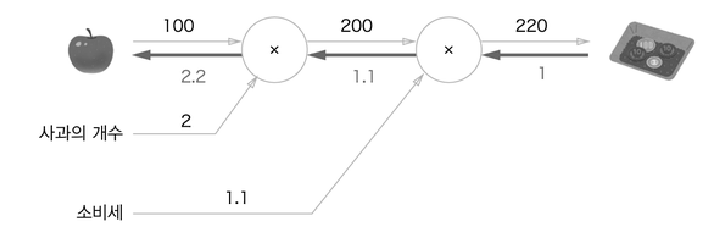

In [6]:
img = imread("./Image/5-5.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

역전파는 순전파와 반대 방향의 화살표(굵은 선)로 그린다. 이 전파는 "국소적 미분"을 전달하고 그 미분 값은 화살표의 아래에 적는다. 이 예에서 역전파는 오른쪽에서 왼쪽으로 "1 -> 1.1 -> 2.2" 순으로 미분 값을 전달하게 된다. 이 결과로부터 "사과 가겨에 대한 지불 금액의 미분" 값은 2.2 라고 할 수 있다. 사과가 1원 오르면 최종 금액은 2.2원 오른다는 뜻이다. 정확히는 사과 값이 아주 조금 오르면 최종 금액은 그 아주 작은 값의 2.2배 만큼 오른다는 뜻이다.


또한 사과 가격에 대한 미분만 구했지만 "소비세에 대한 지불 금액의 미분" 이나 "사과 사과 개수에 대한 지불 금액의 미분" 도 같은 순서로 구할 수 있다. 그리고 그 때는 중간까지 구한 미분의 결과를 공유할 수 있어 다수의 미분을 효율적으로 계산할 수 있다.

# 연쇄법칙

그동안 해온 계산 그래프의 순전파는 계산 결과를 왼쪽에서 오른쪽으로 전달했다. 이 순서는 자연스럽게 느껴질 것이다. 한편 역전파는 "국소적인 미분"을 순방향과는 반대인 오른쪽에서 왼쪽으로 전달한다. 또한 이 "국소적 미분"을 전달하는 원리는 **연쇄법칙(Chain Rule)**에 따른 것이다.

# 계산 그래프의 역전파

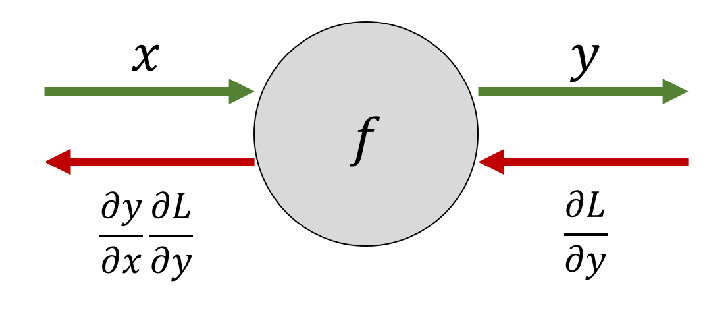

In [7]:
img = imread("./Image/bar.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

위의 그림은 $ y = f(x) $ 라는 계산의 역전파를 그림으로 그린 것이다. 역전파의 계산 절차는 신호 ${\vartheta L \over \vartheta y}$ 에 국소적 미분 ${\vartheta y \over \vartheta x}$ 를 곱한 다음 다음 노드로 전달하는 것이다. 여기서 말하는 국소적 미분은 순전파 때의 $ y = f(x) $ 계산의 미분을 구한다는 것이며, 이는 $x$ 에 대한 $y$의 미분(${\vartheta y \over \vartheta x}$)을 구한다는 뜻이다. 예를 들면, $y=f(x)=2x^2$ 이라면 ${\vartheta y \over \vartheta x} = 2x $ 가 된다. 그리고 이 국소적인 미분을 상류에서 전달된 값(${\vartheta L \over \vartheta y}$)에 곱해 앞쪽 노드로 전달하는 것이다.


이것이 역전파의 계산 순서인데, 이러한 방식을 따르면 목표로 하는 미분 값을 효율적으로 구할 수 있다는 것이 이 전파의 핵심이다.

# 연쇄법칙이란?

연쇄법칙을 알기 위해서는 우선 합성 함수를 이해해야 한다. **합성 함수**란 여러 함수로 구성된 함수이다. 예를 들어 $z=(x+y)^2$ 이라는 식은 $z=t^2$, $t=x+y$ 의 두 개의 식으로 구성된다. 연쇄법칙은 합성 함수의 미분에 대한 성질이며, 다음과 같이 정의된다.


**합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.**


이것이 연쇄법칙의 원리이다. 예를 들면  ${\vartheta z \over \vartheta x}$ ($x$ 에 대한 $z$ 의 미분)은 ${\vartheta z \over \vartheta t}$ ($t$ 에 대한 $z$ 의 미분)과 ${\vartheta t \over \vartheta x}$ ($x$ 에 대한 $t$ 의 미분)의 곱으로 나타낼 수 있다.


$$ {\vartheta z \over \vartheta x} = {\vartheta z \over \vartheta t} {\vartheta t \over \vartheta x}$$


위의 예에서 연쇄법칙을 적용하면,

$$ {\vartheta z \over \vartheta x} = {\vartheta z \over \vartheta t} {\vartheta t \over \vartheta x} = 2t \times 1 = 2(x+y)$$

#  연쇄법칙과 계산 그래프


위의 계산을 계산 그래프로 나타내면 다음과 같다. 2제곱 계산을 "** 2" 노드로 표현하면 다음과 같다. 

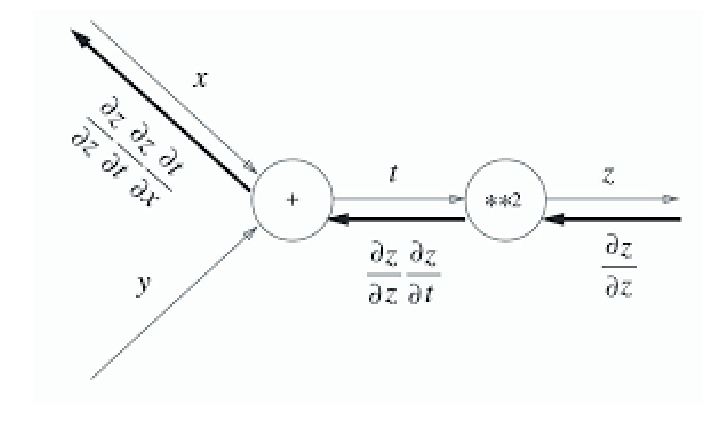

In [8]:
img = imread("./Image/bar2.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

그림에서 계산 그래프의 역전파는 오른쪽에서 왼쪽으로 신호를 전파한다. 역전파의 계산 절차에서는 노드로 들어온 입력 신호에 그 노드의 국소적 미분을 곱한 후 다음 노드로 전달한다. 


예를 들어, "** 2" 노드에서 역전파를 보면, 입력은 ${\vartheta z \over \vartheta z}$ 이며, 이에 국소적인 미분인 ${\vartheta z \over \vartheta t}$ 를 곱하고 다음 노드로 넘긴다.


그렇게 넘어가서 가장 왼쪽의 역전파를 보면,


$$ {\vartheta z \over \vartheta z} {\vartheta z \over \vartheta t} {\vartheta t \over \vartheta x} = {\vartheta z \over \vartheta t} {\vartheta t \over \vartheta x} = {\vartheta z \over \vartheta x}$$


위의 식이 성립되어 "$x$ 에 대한 $z$ 의 미분"이 된다. 즉, 역전파가 하는 일은 연쇄법칙의 원리와 같은 것이다.

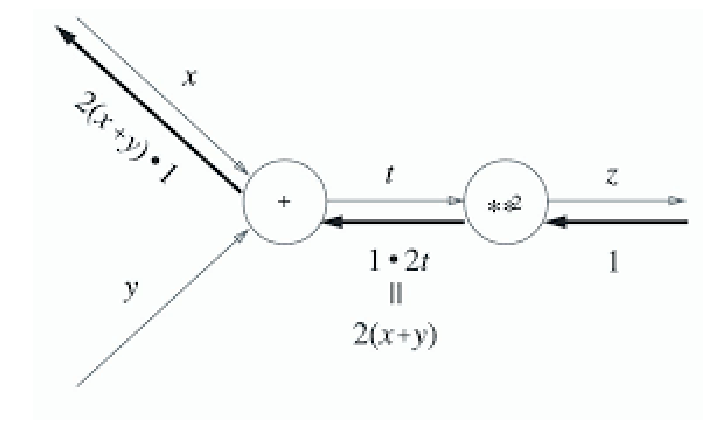

In [9]:
img = imread("./Image/bar3.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

# 역전파

지금까지 계산 그래프의 역전파가 연쇄법칙에 따라 진행되는 모습을 보았다. 이번에는 "+" 와 "X" 등의 연산을 예로 들어 역전파의 구조를 이해해보자.

# 덧셈 노드의 역전파

$z=x+y$ 라는 식을 대상으로 덧셈 노드의 역전파를 살펴보자. 우선 $z=x+y$ 의 미분은 다음과 같이 해석적으로 계산할 수 있다.

$${\vartheta z \over \vartheta x} = 1, \quad {\vartheta z \over \vartheta y} = 1$$

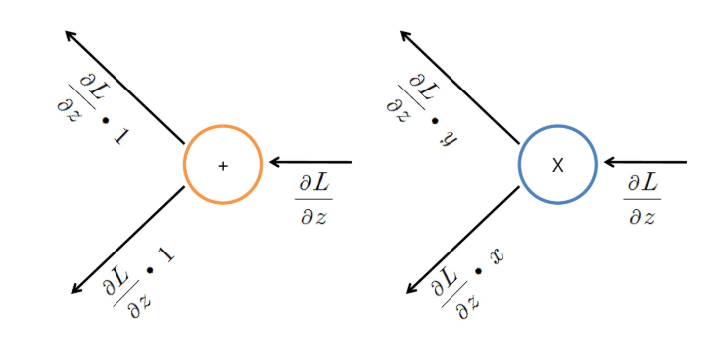

In [10]:
img = imread("./Image/5-9.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

위의 그림을 보면, 덧셈 노드의 역전파는 입력 값을 그대로 흘려보낸다. 상류에서 전해진 미분 (위에서 ${\vartheta L \over \vartheta z}$) 에 1을 곱하여 하류로 흘러보낸다. 즉, 덧셈 노드의 역전파는 1을 곱하기만 할 뿐이므로 입력된 값을 그대로 다음 노드로 보내게 된다.


위에서 상류에서 전해진 미분 값을 ${\vartheta L \over \vartheta z}$ 라고 했는데, 그 이유는 최종적으로 $L$ 이라는 값을 출력하는 큰 계산 그래프를 가정하기 때문이다. $z=x+y$ 계산은 그 큰 계산 그래프의 중간 어딘가에 존재하고, 상류로부터 ${\vartheta L \over \vartheta z}$ 값이 전해진 것이다. 그리고 다시 하류로는 ${\vartheta L \over \vartheta x}$ 과 ${\vartheta L \over \vartheta y}$ 를 전달한다. 


예를 들어 "10 + 5 = 15" 라는 계산이 있고, 상류에서 1.3이라는 값이 흘러나온다. 이를 계산 그래프로 그리면 다음과 같다.

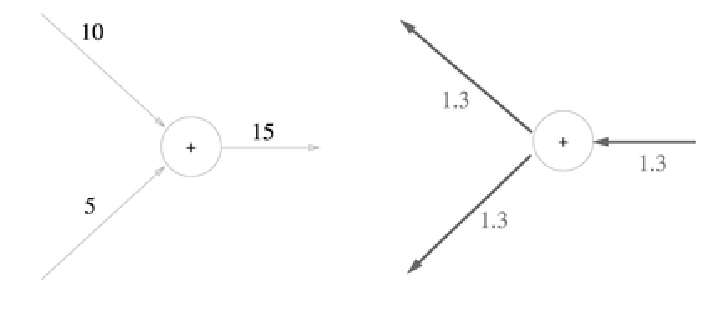

In [11]:
img = imread("./Image/5-11.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

덧셈 노드 역전파는 입력 신호를 다음 노드로 출력할 뿐이므로 1.3을 그대로 다음 노드로 전달한다.

# 곱셈 노드의 역전파

$z=xy$ 라는 식을 생각해보자. 이 식의 미분은 다음과 같다.

$${\vartheta z \over \vartheta x} = x, \quad {\vartheta z \over \vartheta y} = y$$

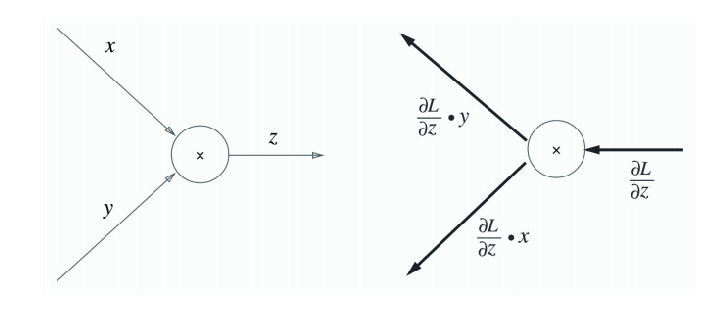

In [12]:
img = imread("./Image/5-12.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

곱셈 노드의 역전파는 상류의 값에 순전파 떄의 입력 신호들을 "서로 바꾼 값"을 곱해서 하류로 보낸다. 서로 바꾼 값이란 순전파 때 $x$ 였다면 역전파에서는 $y$ 를, 순전파 때 $y$ 였다면 역전파에서는 $x$ 로 바꾼다는 의미이다.


예를 들어 "10 X 5 = 50" 이라는 계산이 있고, 역전파 떄 상류에서 1.3 값이 흘러온다고 가정했을 때를 그래프로 그리면 다음과 같다.

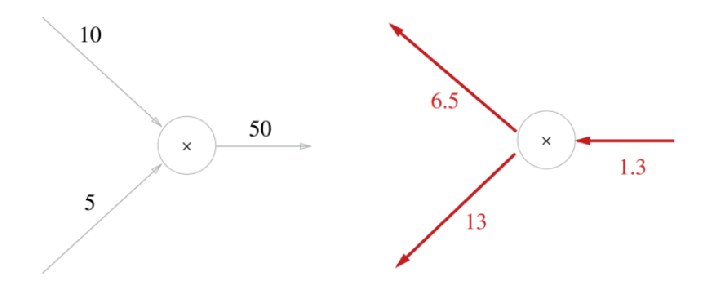

In [13]:
img = imread("./Image/5-13.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

곱셈의 역전파에서는 입력 신호를 바꾼 값을 곱하여 하나는 "1.3 X 5 = 6.5", 다른 하나는 "1.3 X 10 = 13"이 된다. 덧셈의 역전파에서는 상류의 값을 그대로 흘려보내서 순방향 입력 신호의 값은 필요하지 않지만, 곱셈의 역전파는 순방향 입력 신호의 값이 필요하다. 그래서 곱셈 노드를 구현할 때는 순전파의 입력 신호를 변수에 저장해둔다.

# 사과 쇼핑의 예

사과 문제의 예를 다시 살펴보자. 이번에는 사과의 가격, 사과의 개수, 소비세라는 세 변수 각각이 최종 금액에 어떻게 영향을 주느냐를 풀고자 한다. 이는 "사과 가격에 대한 지불 금액의 미분", "사과 개수에 대한 지불 금액의 미분", "소비세에 대한 지불 금액의 미분"을 구하는 것에 해당한다. 이를 계산 그래프의 역전파를 사용해서 풀면 다음과 같다.

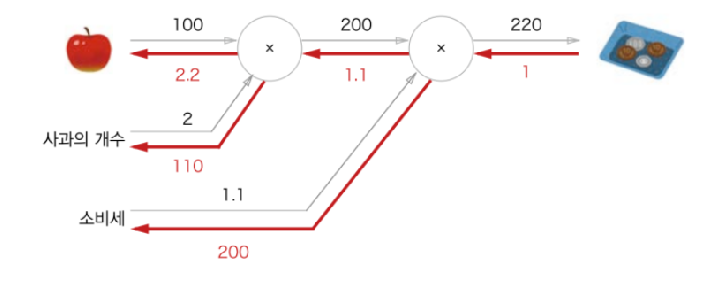

In [14]:
img = imread("./Image/5-14.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

지금까지 설명한 것 처럼 곱셈 노드의 역전파에서는 입력 신호를 서로 바꿔서 하류로 흘린다. 결과를 보면 사과 가격의 미분은 2.2, 사과 개수의 미분은 110, 소비세의 미분은 200이다. 이는 소비세와 사과 가격이 같은 양만큼 오르면 최종 금액에서는 소비세가 200의 크기로, 사과 가격이 2.2의 크기로 영향을 준다고 해석할 수 있다.

# 단순한 계층 구현하기

지금까지 살펴본 "사과 쇼핑"을 파이썬으로 구현해보자. 여기서는 계산 그래프의 곱셈 노드를 "MulLayer", 덧셈 노드를 "AddLayer"라는 이름으로 구현한다.

# 곱셈 계층 구현하기

모든 게층은 forward()와 backward()라는 공통의 메서드를 갖도록 구현한다. forward()는 순전파, backward()는 역전파를 처리한다.

In [15]:
class MulLayer : 
    
    # 인스턴스 변수인 x와 y를 초기화, 이 두 변수는 순전파 시의 입력값을 유지하기 위해서 사용한다.
    def __init__(self) : 
        self.x = None
        self.y = None
    
    # forward()는 x와 y를 인수로 받고 두 값을 곱해서 반환한다.
    def forward(self,x,y) : 
        self.x = x
        self.y = y
        out = x * y
        return out
    
    # backward에서는 상류에서 넘어온 미분(dout)에 순전파 때의 값을 서로 바꿔 곱한 후 하류로 흘린다.
    def backward(self,dout) : 
        dx = dout * self.y
        dy = dout * self.x
        return dx,dy

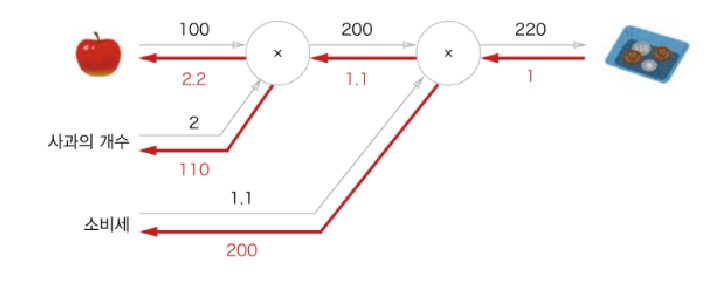

In [16]:
img = imread("./Image/5-16.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

이제 위의 사과 쇼핑을 구현하면...

In [17]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [18]:
# 각 변수에 대한 미분은...
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


역전파의 호출 순서는 순전파일 때와는 반대다. 또 역전파가 받는 인수는 순전파의 출력에 대한 미분이다.

# 덧셈 계층

In [19]:
class AddLayer : 
    
    # 덧셈 계층에서는 초기화가 필요 없으니 __init__() 에서는 아무일도 하지 않는다.
    def __init__(self) : 
        pass
    
    # 순전파는 입력받은 두 인수를 더해서 반환한다.
    def forward(self,x,y) :
        out = x + y
        return out
    
    # 역전파는 상류에서 넘어온 미분값을 그대로 반환한다.
    def backward(self,dout) : 
        dx = dout * 1
        dy = dout * 1
        return dx,dy

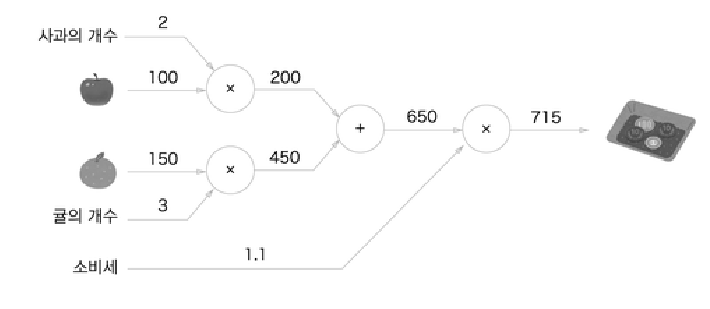

In [20]:
img = imread("./Image/5-3.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

위의 과정을 계산 그래프로 구현하면 다음과 같다.

In [21]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price,orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


# 활성화 함수 계층 구현하기

이제 신경망을 구성하는 층을 각각을 클래스 하나로 구현한다. 우선은 활성화 함수인 ReLU와 Sigmoid 계층을 구현하자.

# ReLU 계층

활성화 함수로 사용되는 ReLU의 수식은 다음과 같다.


$$ y =
\begin{cases}
x \quad x > 0\\
0 \quad x \le 0 
\end{cases}$$


따라서 $x$ 에 대한 $y$ 의 미분은 다음과 같다.

$$ {\vartheta y \over \vartheta x} =
\begin{cases}
1 \quad x > 0\\
0 \quad x \le 0 
\end{cases}$$


순전파 떄의 입력인 $x$가 0 보다 크면 역전파는 상류의 값을 그대로 하류로 흘린다. 반면, 순전파 때 $x$ 가 0 이하이면 역전파는 하류로 신호를 보내지 않는다

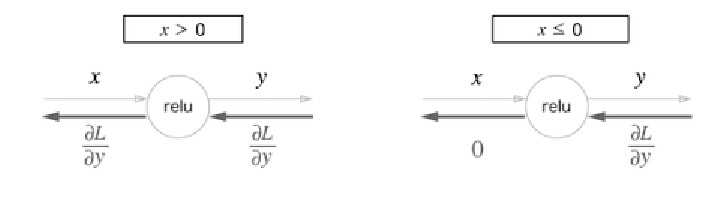

In [22]:
img = imread("./Image/5-18.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

이제 이 ReLu 계층을 구현해 보자. 신경망 계층의 forward()와 backward()는 넘파이 배열을 인수로 받는다고 가정하자.

In [23]:
class ReLU : 
    
    # ReLU 클래스는 mask라는 인스턴스 변수를 갖는다.
    # mask는 True/False로 구성된 넘파이 배열로, 순전파의 입력인 x의 원소 값이 0 이하인 인덱스는 True, 그 외는 False로 유지한다.
    def __init__(self) : 
        self.mask = None
        
    def forward(self,x) : 
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
    
    def backward(self,dout) : 
        dout[self.mask] = 0
        dx = dout
        return dx
    
# 순전파 떄 입력 값이 0 이하이면, 역전파의 값은 0이 되어야 한다.
# 그래서, 역전파 때는 순전파 때 만들어준 mask를 써서 mask의 원소가 True인 곳에는 상류에서 전파된 dout을 0으로 설정한다.

In [24]:
# mask 변수
import numpy as np
x = np.array([[1.0,-0.5],[-2.0,3.0]])
print(x, end="\n\n")
mask = (x <= 0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]

[[False  True]
 [ True False]]


# Sigmoid 계층

시그모이드는 다음 식을 의미하는 함수이다.


$$y={1 \over 1+exp(-x)}$$


이를 계산 그래프로 그리면 다음과 같다.

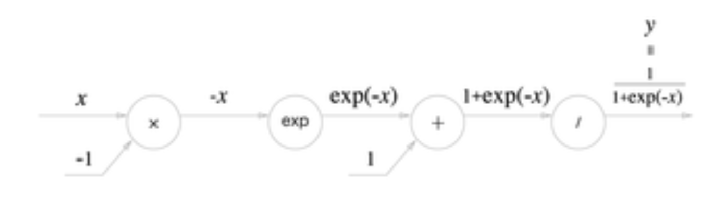

In [25]:
img = imread("./Image/5-19.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

위의 그림에서 이전의 "x"와  "+"말고도 "exp"와 "/" 노드가 추가 되었다. 계산은 국소적 계산의 전파로 이루어진다. 이제 역전파를 한단계씩 알아보자.

#### 1단계
"/"노드, 즉 $y={1 \over x}$ 를 미분하면 ${\vartheta y \over \vartheta x} = - {1 \over x^2} = -y^2$ 이므로 역전파 때는 상류에서 흘러온 값에 $-y^2$ 값을 곱해서 하류로 전달한다.

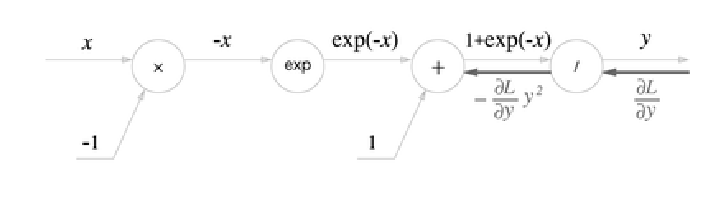

In [26]:
img = imread("./Image/5-20.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

#### 2단계
"+"노드는 상류의 값을 여과 없이 하류로 내보내는 단게다. 계산 그래프에서는 다음과 같다.

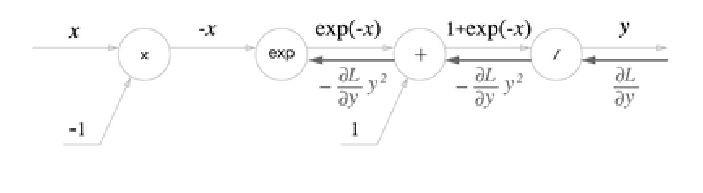

In [27]:
img = imread("./Image/5-21.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

#### 3단계
"exp"노드는 $y=exp(x)$ 연산을 수행하며, 그 미분은 다음과 같다.

$${\vartheta y \over \vartheta x} = exp(x) = e^x$$


계산 그래프에서는 상류의 값에 순전파 때의 출력을 곱해 하류로 전파한다.

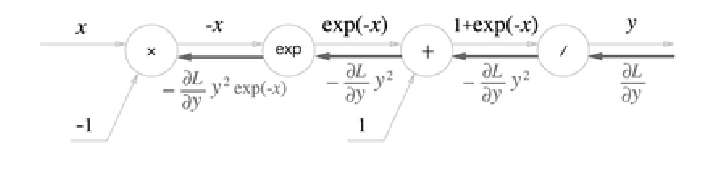

In [28]:
img = imread("./Image/5-22.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

#### 4단계
"X" 노드는 순전파 때의 값을 "서로 바꿔 곱한다." 이 예서는 -1을 곱하면 된다.

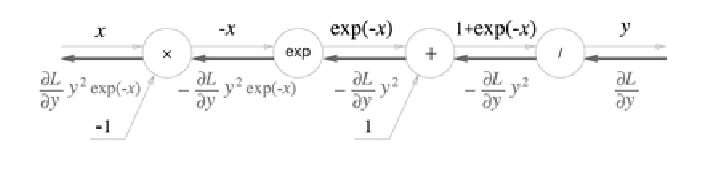

In [29]:
img = imread("./Image/5-23.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

총 4단계를 거쳐 Sigmoid 계층의 역전파를 계산 그래프로 완성했다. 역전파 최종 출력인 ${\vartheta L \over \vartheta y}y^2exp(-x)$ 값이 하류 노드로 전파된다. 여기서 ${\vartheta L \over \vartheta y}y^2exp(-x)$ 는 입력 $x$ 와 출력 $y$ 만으로 계산할 수 있다.

sigmoid 계산 그래프의 중간 과정을 모두 먺어 단순한 노드로 만들 수 있다.

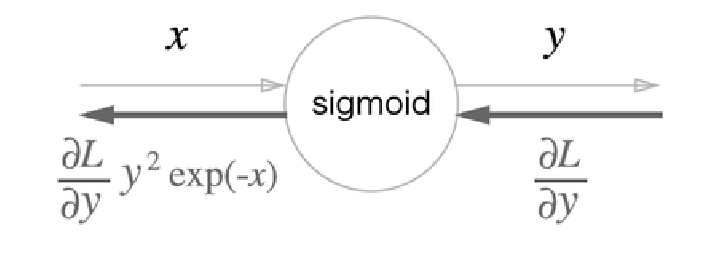

In [30]:
img = imread("./Image/5-23-1.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

계산 그래프의 복잡한 과정을 간소화 시켜도 결과는 똑같다. 그러나 간소화 버전은 역전파 과정의 중간 계산들을 생략할 수 있어 더 효율적인 계산이다. 또 노드를 그룹화하여 Sigmoid 계층의 세세한 내용을 노출하지 않고 입력과 출력에만 집중할 수 있다는 것도 중요한 포인트이다.


또한, ${\vartheta L \over \vartheta y}y^2exp(-x)$ 는 다음처럼 정리해서 쓸 수 있다.

$${\vartheta L \over \vartheta y}y^2exp(-x) = {\vartheta L \over \vartheta y}{1 \over (1+exp(-x))^2}exp(-x)$$


$$ = {\vartheta L \over \vartheta y}{1 \over 1+exp(-x)}{exp(-x) \over 1+exp(-x)}$$


$$ = {\vartheta L \over \vartheta y}y(1-y)$$


이처럼, Sigmoid 계층의 역전파는 순전파 출력($y$)만으로 계산할 수 있다.

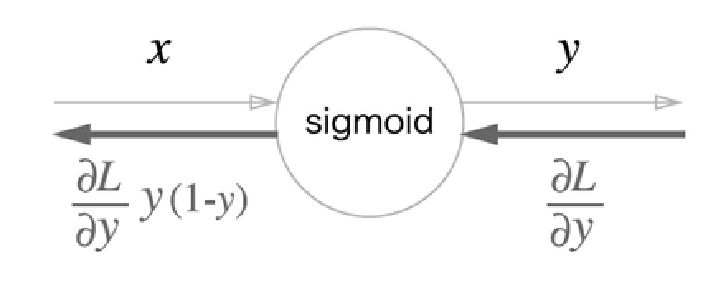

In [31]:
img = imread("./Image/5-22-1.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

In [32]:
# Sigmoid 계층 파이썬 구현
class Sigmoid : 
    
    def __init__(self) : 
        self.out = None
        
    def forward(self,x) : 
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self,dout) : 
        dx = dout * (1.0 - self.out) * self.out
        return dx

# Affine 계층

신경망의 순전파에서는 가중치 신호의 총합을 계산하기 때문에 행렬의 곱을 사용했다.

In [33]:
# 행렬의 곱으로 신호의 총합 계산
X = np.random.rand(2)
W = np.random.rand(2,3)
B = np.random.rand(3)

print("X shape :", X.shape)
print("W shape :", W.shape)
print("B shape :", B.shape)

Y = np.dot(X,W) + B
print("Y shape :", Y.shape)

X shape : (2,)
W shape : (2, 3)
B shape : (3,)
Y shape : (3,)


여기서 X,W,B는 각각 형상이 (2,), (2,3), (3,)인 다차원 배열이다. 그러면 뉴런의 가중치 합은 Y=np.dot(X,W)+B 처럼 계산한다. 그리고 이 Y를 활성화 함수로 변환해 다음 층으로 전파하는 것이 신경망 순전파의 흐름이었다.


행렬의 곱 계산은 대응하는 차원의 원소 수를 일치시키는 게 핵심이다. 예를 들어 X와 W의 곱은 아래 그림처럼 대응하는 차원의 원소 수를 일치시켜야 한다.

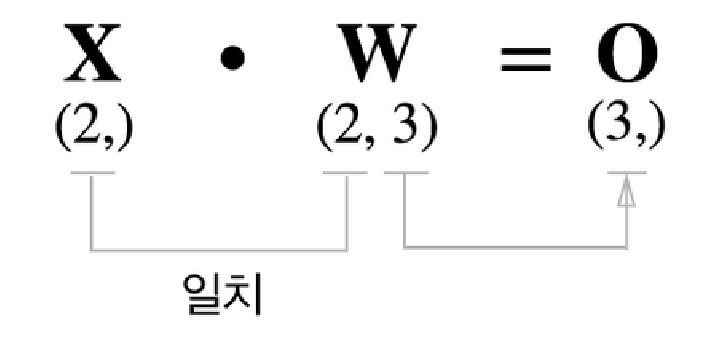

In [34]:
img = imread("./Image/5-23-2.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

신경망의 순전파 때 수행하는 행렬의 곱은 기하학에서는 어파인 변환(Affine transformation)이라고 한다. 그럼 이제 앞에서 수행한 행렬의 곱과 편향의 합 계산을 계산 그래프로 그려보자. 곱을 계산하는 노드를 "dot"이라 하면, np.dot(X,W) + B는 아래 그림처럼 그려진다. 또한 각 변수의 이룸 위에 그 변수의 형상도 표기한다.

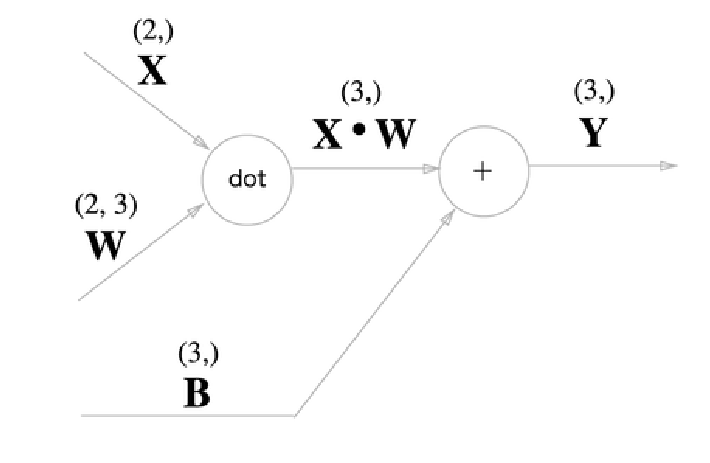

In [35]:
img = imread("./Image/5-24.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

비교적 단순한 계산 그래프이다. 단, X,W,B가 행렬이라는 점에 주의하자. 지금까지의 계산 그래프는 노드 사이에 "스칼라값"이 흘렀지만, 이번에는 "행렬"이 흐르고 있는 것이다.


이제 역전파를 생각해보자. 행렬을 사용한 역전파도 행렬의 원소마다 전개해보면 스칼라값을 사용한 지금까지의 계산 그래프와 같은 순서로 생각할 수 있다. 실제로 전개해보면 다음 식이 도출된다.

$${\vartheta L \over \vartheta X} = {\vartheta L \over \vartheta Y} \cdot W^T$$

$${\vartheta L \over \vartheta W} = X^T \cdot {\vartheta L \over \vartheta Y}$$


여기서 $W^T$ 의 $T$ 는 전치행렬을 뜻한다. 전치행렬은 $W$의 $(i,j)$ 위치의 원소를 $(j,i)$ 위치로 바꾼 것을 말한다.


$$W = \begin{pmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{pmatrix}$$

$$W^T = \begin{pmatrix} w_{11} & w_{21} \\ w_{12} & w_{22} \\ w_{13} & w_{23} \end{pmatrix}$$


만약, $W$ 의 형상이 $(2,3)$ 이었다면, $W^T$ 의 형상은 $(3,2)$가 된다. 이를 바탕으로 Affine 계층의 역전파를 계산 그래프로 구현하면 다음과 같다.

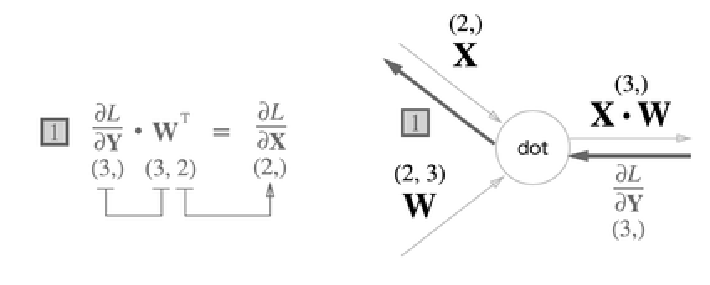

In [36]:
img = imread("./Image/5-25.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

계산 그래프에서는 각 변수의 형상에 주의해야 한다. 특히 $X$ 와 ${\vartheta L \over \vartheta X}$ 은 같은 형상이고, $W$ 와 ${\vartheta L \over \vartheta W}$ 도 같은 형상이다.


$$X = (x_0, x_1, \cdot\cdot\cdot, x_n)$$

$${\vartheta L \over \vartheta X} = ({\vartheta L \over \vartheta x_0},{\vartheta L \over \vartheta x_1},\cdot\cdot\cdot,{\vartheta L \over \vartheta x_n})$$

# 배치용 Affine 계층

지금까지 본 Affine 계층은 입력 데이터로 $X$ 하나만을 고려한 것이었다. 이번에는 데이터 $N$ 개를 묶어 순전파하는 경우, 즉 배치용 Affine 계층을 구현해보자.

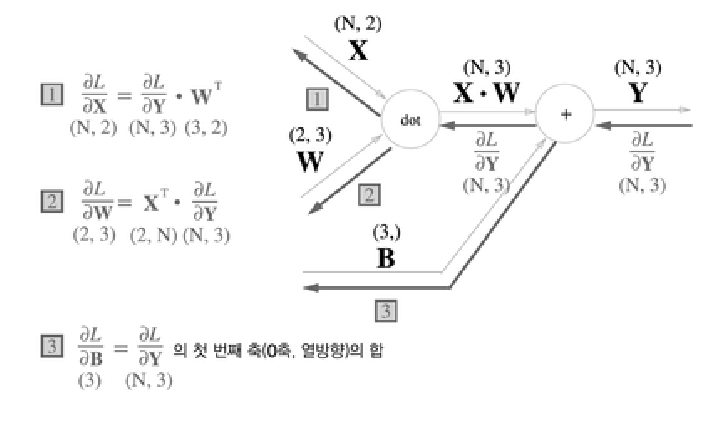

In [37]:
img = imread("./Image/5-27.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

기존에서 달라진 점은 입력인 $X$ 의 형상이 $(N,2)$ 가 된 것 뿐이다. 그 뒤로는 지금까지와 같이 계산 그래프의 순서를 따라 순순히 행렬 계산을 하게 된다. 또 역전파 떄는 행렬의 형상에 주의하면 ${\vartheta L \over \vartheta X}$ 과 ${\vartheta L \over \vartheta W}$ 은 이전과 같이 도출할 수 있다.


편향을 더할 때도 주의해야 한다. 순전파 때의 편향 덧셈은 $X \cdot W$ 에 대한 편향이 각 데이터에 더해진다. 예를 들어 $N=2$ 로 한 경우, 편향은 그 두 데이터에 각각 더해진다.

In [38]:
X_dot_W = np.array([[0,0,0],[10,10,10]])
B = np.array([1,2,3])

print("X_dot_W :\n",X_dot_W)
print("X_dot_W + B :\n",X_dot_W + B)

X_dot_W :
 [[ 0  0  0]
 [10 10 10]]
X_dot_W + B :
 [[ 1  2  3]
 [11 12 13]]


순전파의 편향 덧셈은 각각의 데이터에 더해진다. 그래서 역전파 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 한다.

In [39]:
dY = np.array([[1,2,3],[4,5,6]])
print("dY : \n",dY)

dB = np.sum(dY, axis=0)
print("dB : \n",dB)

dY : 
 [[1 2 3]
 [4 5 6]]
dB : 
 [5 7 9]


이 예에서는 데이터가 2개라고 가정한다. 편향의 역전파는 그 두 데이터에 대한 미분을 데이터마다 더해서 구한다. 그래서 np.sum()에서 0번째 축에 대해서 총합을 구하는 것이다.

In [40]:
# Affine 계층 구현
class Affine : 
    
    def __init__(self,W,b) : 
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self,x) : 
        self.x = x
        out = np.dot(x,self.W) + self.b
        return out
    
    def backward(self,dout) : 
        dx = np.dot(dout,self.W.T)
        self.dW = np.dot(slef.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx

# Softmax-with-Loss 계층

마지막은 출력층에서 사용하는 소프트맥스 함수이다. 앞에서 본 것처럼 소프트맥스 함수는 입력값을 정규화하여 출력한다.


입력 이미지가 Affine 계층과 ReLU 계층을 통과하며 변환되고, 마지막 Softmax 계층에 의해서 10개의 입력이 정규화된다. 이 그림에서는 숫자 "0"의 점수는 5.3이며, 이를 Softmax를 통과하면서 0.008(0.8%)로 변환된다. 또 "2"의 점수는 10.1에서 0.991(99.1%)로 변환된다.


또한 Softmax 계층은 입력값을 정규화(출력의 합이 1이 되도록 변형)하여 출력한다. 또한, 손글씨 숫자는 경우의 수가 10개(10 class 분류)이므로 softmax 계층의 입력은 10개가 된다.

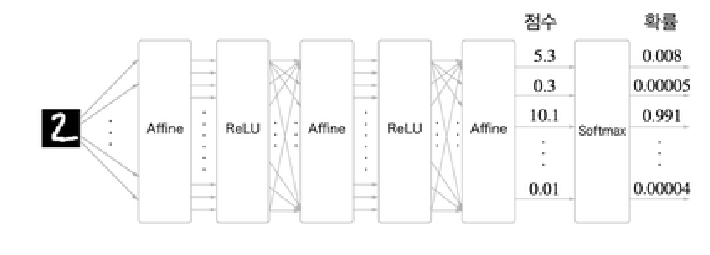

In [41]:
img = imread("./Image/5-28.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

다음은 softmax-with-loss 계층의 계산 그래프이다. 보다시피 softmax-with-Loss 계층은 다소 복잡하다. 이 복잡한 그래프를 간소화 할 수 있다.

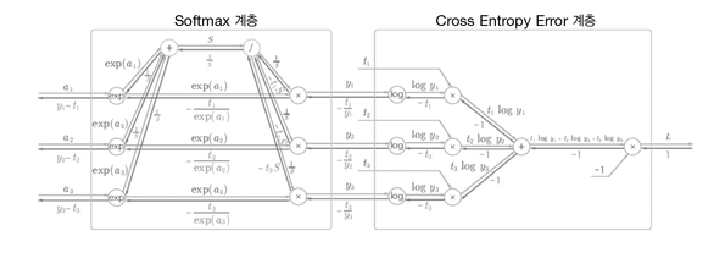

In [42]:
img = imread("./Image/5-29.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

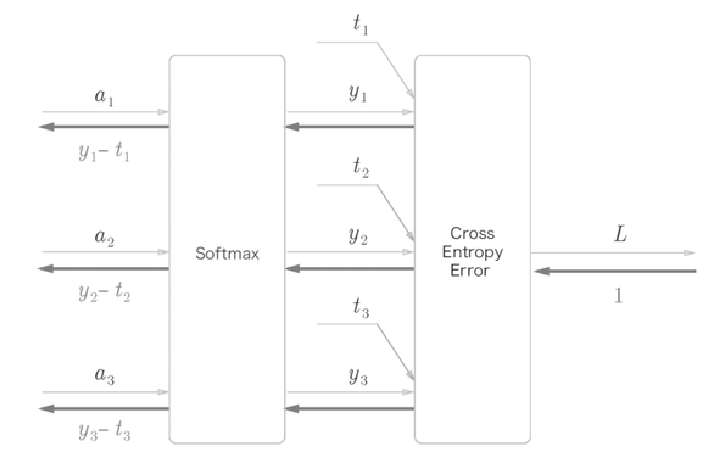

In [43]:
img = imread("./Image/5-30.png") ; plt.figure(figsize=(12,12)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

위의 계산 그래프에서 소프트맥스 함수는 "Softmax" 계층으로, 교차 엔트로피 오차는 "Cross Entropy Error" 계층으로 표기했다. 여기에서는 3 클래스 분류를 가정하고 이전 계층에서 3개의 입력(점수)을 받는다. 그림과 같이 Softmax 계층은 입력 $(a_1,a_2,a_3)$ 를 정규화 하여 $(y_1,y_2,y_3)$ 를 출력한다. Cross Entropy Error 계층은 Softmax의 출력 $(y_1,y_2,y_3)$ 와 정답 레이블 $(t_1,t_2,t_3)$ 를 받고, 이 데이터들로부터 손실 $L$ 을 출력한다.


여기서 주목할 점은 역전파의 결과이다. Softmax 계층의 역전파는 $(y_1-t_1,y_2-t_2,y_3-t_3)$ 이라는 깔끔한 결과를 내놓는다. $(y_1,y_2,y_3)$ 는 softmax 계층의 출력이고, $(t_1,t_2,t_3)$ 는 정답 레이블이므로 역전파의 결과는 Softmax의 출력과 정답 레이블의 차분인 것이다. 신경망의 역전파에서는 이 차이인 오차가 앞 계층에 전해지는 것이다. 이는 신경망 학습의 중요한 성질이다.


그런데, 신경망 학습의 목적은 신경망 출력이 정답 레이블과 가까워지도록 가중치 매개변수의 값을 조정하는 것이다. 그래서 신경망의 출력과 정답 레이블의 오차를 효율적으로 앞 계층에 전달해야 한다. 앞의 $(y_1-t_1,y_2-t_2,y_3-t_3)$ 라는 결과는 바로 Softmax 계층 출력과 정답 레이블의 차이로, 신경망의 현재 출력과 정답 레이블의 오차를 있는 그대로 드러낸 것이다.


이는 교차 엔트로피 오차라는 함수가 말끔한 결과를 내도록 설계되었기 때문이다. 또, 회귀의 출력층에서 사용하는 "항등함수"의 손실 함수로 "평균 제곱 오차"를 사용하는 이유도 이와 같다. 즉 "항등 함수"의 손실 함수로 "평균 제곱 오차"를 사용하면 역저가의 결과가 $(y_1-t_1,y_2-t_2,y_3-t_3)$로 말끔히 떨어진다.


구체적인 예를 들어보면, 정답 레이블이 (0,1,0)일 때 Softmax 계층이 (0.3,0.2,0.5)를 출력했다고 하자. 정답 레이블을 보면 정답의 인덱스는 1이다. 그런데 출력에서는 확률이 0.2에 불과하다. 이 시점의 신경망은 제대로 인식하지 못하고 있다. 이 경우 Softmax 계층의 역전파는 (0.3,-0.8,0.5)라는 커다란 오차를 전파한다. 결과적으로 Softmax 계층의 앞 계층들은 그 큰 오차로부터 큰 깨달음을 얻게 된다.


이번에는 정답 레이블이 똑같이 (0,1,0)일 때 Softmax 계층이 (0.01,0.99,0)을 출력한 경우이다. 이 신경망은 꽤 정확히 인식하고 있다. 이 경우 Softmax 계층의 역전파가 보내는 오차는 비교적 작은 (0.01, -0.01,0)이다. 이번에는 앞 계층으로 전달된 오차가 작으므로 학습하는 정도도 작아진다.

In [44]:
def softmax(x):
    
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    x = x - np.max(x)  # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


def cross_entropy_error(y, t):

    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# Softmax-with-Loss 계층 구현
class SoftmaxWithLoss : 
    
    def __init__(self) : 
        self.loss = None  # 손실
        self.y = None     # Softmax의 출력
        self.t = None     # 정답 레이블
        
    def forward(self,x,t) : 
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1) : 
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

# 오차역전파법 구현하기

앞에서 구현한 여러 계층들을 조합하면 마치 레고 블록을 조합하듯 신경망을 구축할 수 있다. 이번에는 지금까지 구현한 계층을 조합해서 신경망을 구축해보자.

# 신경망 학습의 전체 그림

#### 전제
 - 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 "학습"이라 한다. 신경망 학습은 다음과 같이 4단계로 수행한다.

#### 1단계 : 미니배치
 - 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표이다.
 
#### 2단계 : 기울기 산출
 - 미니 배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
 
#### 3단계 : 매개변수 갱신
 - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
 
 
오차역전파법이 등장하는 단계는 두 번째인 "기울기 산출"이다. 앞 장에서는 이 기울기를 구하기 위해서 수치 미분을 사용했다. 오차역전파법을 이용하면 느린 수치 미분과 달리 기울기를 효율적이고 빠르게 구할 수 있다.

In [45]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet : 
    
    def __init__(self, input_size, hidden_size, output_size, weigth__init__std=0.01) : 
        
        # 가중치 초기화
        self.params = {}
        self.params["W1"] = weigth__init__std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weigth__init__std * np/random.randn(hidden_size, output_size)
        self.params["b1"] = np.zeros(output_size)
        
        # 계층 생성
        self.layers = OrderedDict()
        self.layers["Affine1"] = Affine(self.params["W1"], self.params["b1"])
        self.layers["ReLU"] = relu()
        self.layers["Affine2"] = Affine(slef.params["W2"], self.params["b2"])
        self.lastLayer = SoftmaxWithLoss()
    
    # 예측값
    def predict(self,x) :
        for layer in self.layers.values() : 
            x = layer.forward(x)
        return x
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self,x,t) : 
        y = self.predict(x)
        return self.lastLayer.forward(y,t)
    
    # 정확도
    def accuracy(self,x,t) : 
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : 
            t = np.argmax(t,axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 수치 미분
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self,x,t) : 
        loss_W = lambda W : self.loss(x,t)
        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        return grads
    
    def gradient(self,x,t) : 
        
        # 순전파
        self.loss(x,t)
        
        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers : 
            dout = layer.backward(dout)
            
        # 결과저장
        grads={}
        grads["W1"] = self.layers["Affine1"].dW
        grads["b1"] = self.layers["Affine1"].db
        grads["W2"] = self.layers["Affine2"].dW
        grads["b2"] = self.layers["Affine2"].db
        return grads

신경망의 계층을 OrderedDict에 보관하는 점이다. OrderedDict은 순서가 있는 딕셔너리다. "순서가 있는"이란 딕셔너리에 추가한 순서를 기억하는 것이다. 그래서 순전파 때는 추가한 순서대로 각 계층의 forward() 메서드를 호출하기만 하면 처리가 완료된다. 마찬가지로 역전파 때는 계층을 반대 순서로 호출하기만 하면 된다. Affine 계층과 ReLU 계층이 각자의 내부에서 순전파와 역전파를 제대로 처리하고 있으니, 그냥 계층을 올바른 순서로 연결한 다음 순서대로(혹은 역순으로) 호출해주면 끝이다.


이처럼 신경망의 구성 요소를 "계층"으로 구현한 덕분에 신경망을 쉽게 구축할 수 있었다. "꼐층"으로 모듈화해서 구현한 효과는 아주 크다. 예를 들어 5층, 10층, 20층과 같이 깊은 신경망을 만들고 싶다면, 단순히 필요한 만큼 계층을 추가하면 되기 때문이다.

# 오차역전파법으로 구한 기울기 검증하기

지금까지 기울기를 구하는 두 가지 방법을 공부했다. 하나는 수치 미분을 써서 구하는 방법, 하나는 해석적으로 수식을 풀어 구하는 방법이다. 후자인 해석적 방법은 오차역전파법을 이용하여 매개변수가 많아도 효율적으로 계산할 수 있었다. 


수치 미분은 느리다. 그리고 오차역전파법을 제대로 구현해두면 수치 미분은 더 이상 필요없다. 그렇다면 수치 미분은 정말 아무런 쓸모가 없을까? 사실은 수치 미분은 오차역전파를 정확히 구현했는지 확인하기 위해 필요하다. 


수치 미분의 이점은 구현하기 쉽다는 것이다. 그래서 수치 미분의 구현에는 버그가 숨어 있기 어려운 반면, 오차역전파법은 구현하기 복잡해서 종종 실수를 하곤 한다. 글서 수치 미분은 오차역전파법의 결과를 비교하여 오차역전파법을 제대로 구현했는지 검증하곤 한다. 이처럼 두 방식으로 구한 기울기가 일치함을 확인하는 작업을 **기울기 확인(gradient check)** 기울기 확인은 다음과 같이 구현한다.

In [46]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:1.9603013701308803e-10
b1:1.013788298625173e-09
W2:7.160689054311332e-08
b2:1.432437713097534e-07


가장 먼저 MNIST 데이터셋을 읽는다. 그리고 훈련 데이터 일부를 수치 미분으로 구한 기울기와 오차역전파법으로 구한 기울기의 오차를 확인한다. 여기에서는 각 가중치 매개변수의 ㅏ이를 절댓값을 구하고, 이를 평균한 값이 오차가 된다.


결과를 보면 수치 미분과 오차역전파법으로 구한 기울기의 차이가 매우 작다고 말해준다. 예를 들어 1번째 층의 편향 오차는 2.1827060259941135e-10로 매우 작다.

# 오차역전파법을 사용한 학습 구현하기

In [47]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
from mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.11236666666666667 0.1135
0.7818166666666667 0.7867
0.8742 0.8783
0.8978666666666667 0.9023
0.9079833333333334 0.9109
0.91465 0.9165
0.9202833333333333 0.9218
0.9252666666666667 0.927
0.92865 0.9296
0.9326333333333333 0.9327
0.9348 0.9358
0.93785 0.9379
0.9396333333333333 0.9384
0.94225 0.9408
0.9440833333333334 0.9425
0.94575 0.9432
0.9474833333333333 0.9444
